# Back Bay National Wildlife Refuge


> Back Bay National Wildlife Refuge is located in the southeastern corner of the City of Virginia Beach. The refuge was established in 1938 to protect and provide habitat for migrating and wintering waterfowl. Diverse habitats, including beachfront, freshwater marsh, dunes, shrub-scrub and upland forest are home to hundreds of species of birds, reptiles, amphibians, mammals and fish.

![BNWR](https://www.fws.gov/sites/default/files/styles/banner_image_xl/public/banner_images/2020-09/waterfowl%20%28tundras%29.jpg?h=0c8d0f81&itok=NcZlpD27)


To get introduced to the park and its history, please view the following interactive story map.

[BBNWR History and Introduction](https://storymaps.arcgis.com/stories/960d9db38cca4f3d8d38111119b9874f)

Additionally, here is some drone footage of the park for a better look at the geography and ecology of the area.

[BBNWR Drone Footage](https://www.youtube.com/watch?v=NlW330aBTCc)


In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
bbnwr = pd.read_csv("/content/gdrive/MyDrive/Stats 206 Winter 2024/data/BKB_WaterQualityData_2020084.csv")
bbnwr.columns

Index(['Site_Id', 'Unit_Id', 'Read_Date', 'Salinity (ppt)',
       'Dissolved Oxygen (mg/L)', 'pH (standard units)', 'Secchi Depth (m)',
       'Water Depth (m)', 'Water Temp (?C)', 'Air Temp-Celsius',
       'Air Temp (?F)', 'Time (24:00)', 'Field_Tech', 'DateVerified',
       'WhoVerified', 'AirTemp (C)', 'Year'],
      dtype='object')

In [4]:
bbnwr["Site_Id"].replace('d', 'D', inplace = True)

## Question 1


### Q1a

The water in BBNWR is a mix of fresh water and sea water. Sea water has an average salinity of 35 ppt (parts per thousand). Because fresh water flows into the Bay, however, the level of salinity can be much lower, depending how much fresh water enters the system. Such systems are described through a tiered system of descriptions based on the amount of salt in the water.

A oligohaline mixture is one in which the saline content is between 0.5 - 5.0. More details on [classifying estuaries can be found in this EPA report](https://www.epa.gov/sites/default/files/2015-09/documents/2009_03_13_estuaries_monitor_chap14.pdf).

Let's test the theory that the measurements from the Bay come from a oligohaline mixture, so that salinity is more than 0.5.

For this hypothesis test will we use a $\alpha$-level (maximum Type I error probability) of $0.003$.

Clearly state:

- The null hypothesis
- The alternative hypothesis
- A suitable test statistic
- The standard error of this test statistic
- A rejection region that will have probability of including the test statistic 0.16 when the null hypothesis is true.




Null:

*   The population mean is more than .5

Alternative:

*   The population mean is less than or equal to .5

A suitable test statistic would be a sample mean

In [19]:
stdx = bbnwr["Salinity (ppt)"].std()
n = len(bbnwr["Salinity (ppt)"])
sem = stdx/np.sqrt(n)
print("Our standard error from the mean is", sem)
print("Our rejection region is", .5 + 3 * sem)


Our standard error from the mean is 0.025277161730154138
Our rejection region is 0.5758314851904625


### Q1b

Now that we have described our hypothesis test, compute all quantities needed to compute the test statistic, standard error, and rejection region. You may find it helpful to create a table that only includes observations from the Bay with non-missing values for "Salinity (ppt)".

In [6]:
new_table = bbnwr.copy()
new_table["Salinity (ppt)"].dropna()
sample_mean = new_table["Salinity (ppt)"].mean()
sem = new_table["Salinity (ppt)"].mean() / np.sqrt(len(new_table["Salinity (ppt)"]))
.5 + 3 * sem
# Our rejection region would be a test stastiic of [.5441 to 5.0]

0.5441790105646941

### Q1c

Perform the hypothesis test. Clearly state whether you reject or fail to reject the null hypothesis. Interpret this result with result to the original question of whether the average salinity of the Bay seems to be less than 35 ppt.

In [7]:
sample_mean = new_table["Salinity (ppt)"].mean()
sample_mean

0.7170682730923695

We would reject the null hypothesis because our test statistic falls into the rejection region. This would suggest that the salinity is less than 35ppt

### Q1d

We could also approach this question by creating a confidence interval for the average salinity in the population of all measurements in the Bay.

Using the quantities above, create a 99.7% confidence interval of the average salinity of the Bay. What does this interval tell us about the following table of salinity mixture tiers:

| Level | Salinity |
| ----- | -------- |
| Fresh Water | < 0.5 ppt |
| Oligohaline | 0.5 -- 5.0 ppt|
| Mesohaline | 5.0-18.0 ppt|
| Polyhaline | 18.0­ -- 30 ppt |
| Ocean | > 30 ppt |

Which of these levels can be ruled out for the Bay?

In [8]:
sample_mean - 3 * sem, sample_mean + 3 * sem

(0.6728892625276754, 0.7612472836570636)

We are 99.7 percent confident that the true salinity is Oligohaline. It is very unlikely to get a sample of Mesohaline, Polyhaline or Ocean, or Fresh Water.

## Question 2





### Q2a

A [Secchi disk](https://en.wikipedia.org/wiki/Secchi_disk) is a device used to measure the clarity of water by submerging the disk and measuring the depth at which it is no longer visible.

![Secchi Disk](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Secchi_disk_pattern.svg/240px-Secchi_disk_pattern.svg.png)

A common definition of "clear water" is being able to view a Secchi disk at 4m; however, in the case of the BBNWR, most of the depths are less than 4m:




<Axes: xlabel='Water Depth (m)', ylabel='Count'>

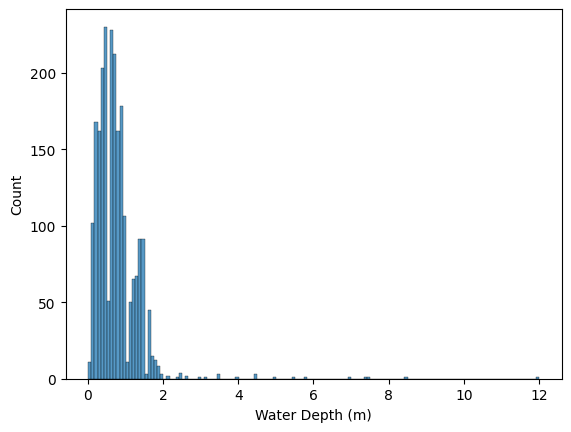

In [9]:
sb.histplot(data = bbnwr, x = "Water Depth (m)")

Create a new column "clear" that is `True` if either of the following conditions is met:

- The "Secchi Depth (m)" is at least 4m
- The "Secchi Depth (m)" is at least as large as the "Water Depth (m)" (due to small differences due to waves/location/etc
 Secchi Depth can be (slightly) greater than Water Depth)

 Display the proportion of "clear" observations.



In [13]:
bbnwr["clear"] = (bbnwr["Secchi Depth (m)"] >= 4) | (bbnwr["Secchi Depth (m)"] >= bbnwr["Water Depth (m)"])
sample_prop = bbnwr["clear"].mean()
print("The proportion of clear obervations is", sample_prop)

The proportion of clear obervations is 0.3888654576128216


### Q2b

Using the estimated standard error for proportion, test the hypothesis that 40% of measures are "clear" against the alterntaive they the percentage of clear measurements is some other value. Use $\alpha = 0.05$.



In [14]:
se_p_hat = np.sqrt(sample_prop * (1 - sample_prop) / bbnwr["clear"].count())
print(.4 - 2 * se_p_hat, .4 + 2 * se_p_hat)
print(sample_prop)

0.37997685382011126 0.4200231461798888
0.3888654576128216


Interpret the result: do you think there is strong evidence against the claim that 40% of measuremnts (in the population of all measurements) are clear?

At an alpha value of .05, we would fail to reject the null. Our test statistics does not fall within our rejection region (p_hat < .3799999 | .4200 < p_hat). This suggests it's likely 40 percent of our measurements are clear.

### Q2c

Refering the result from the previous section, compute the $p$-value for this hypothesis.


In [15]:
from scipy.stats import norm
# you will find norm.cdf helpful

z = (sample_prop - 4/10) / se_p_hat
2 * norm.cdf(z)
#two tailed test

0.26606630310319546

Consider three different people:

- Person A has a 10% tolerance for Type I errors
- Person B has a 5% tolerance for Type I errors
- Person C has a 1% tolerance for Type I errors

Which of these people (if any) would reject the null hypothesis that 40% of all possible measurements would be clear. Justify your answer.

None of them would reject the null hypothesis. Our p value was .26. Thus, based on the tolerancess of making a type 1 error in perosn a,b, and c none would reject the null. .26 is greater than .10, .05, and .01


### Q2d

Using values you computed in the previous sections, create a 95% confidence interval for the proportion of clear observations in the population of all observations.



In [16]:
print(sample_prop - 2 * se_p_hat, sample_prop + 2 * se_p_hat)

0.36884231143293283 0.40888860379271036



Explain why you knew that the value 0.4 would not appear in that interval based on the results of Q2c.



I knew the value of .4 would appear in the interval because at 10%, 5%, and 1% alpha levels we failed to reject the null hypothesis (the true proportion of clear measurements is .4). We knew that the value of .4 would appear in this confidence interval because we created a rejection region in part c and b

## Question 3


### Q3a

Recall that if there is no relationship between two variables (i.e., they are statistically independent in the population), then the correlation coefficient will be zero (or more generally, if there is no linear relationship).

Using the standard error for a correlation coefficient. Test the hypothesis that the correlation between "AirTemp (C)" and "Water Temp (?C)" is zero against the alternative that it is non-zero. Use an $\alpha$-level of 0.05.

Note: it is helpful to create a table that only these two variables and no missing values.





In [17]:
corr_table = bbnwr[["AirTemp (C)", "Water Temp (?C)"]].copy()
corr_table = corr_table.dropna()
sample_size = len(corr_table["AirTemp (C)"])
standard_error = 1/sample_size
print(0 - 2 * standard_error, 0 + 2 * standard_error)
corr = corr_table["AirTemp (C)"].corr(corr_table["Water Temp (?C)"])
print("The corr from our sample is,", corr)


-0.0008888888888888889 0.0008888888888888889
The corr from our sample is, 0.6803449857846111


Interpret this result. Would you reject the hypothesis that there is no linear relationship between these two variables (in the population)?


We would reject the null hypothesis that the correlation coefficient will be zero. There is sufficient evidence with an alpha level of .05 that there is some linear relationship between the two variables.

### Q3b

Create two confidence intervals for the population correlation coefficient:

- a 95% CI
- a 99.7% CI


In [20]:
print(corr - 2 * standard_error, corr + 2 * standard_error)
print(corr - 3 * standard_error, corr + 3 * standard_error)

0.6794560968957222 0.6812338746735
0.6790116524512778 0.6816783191179444


Which interval is wider? Explain why we know this would be true without ever calculating the intervals.

The interval that is wider is the 99.7 percent. Intuitively, we are essnetially casting out a bigger net, so the interval is going to be wider as to hopefully have a higher chance of getting a sample that captures the true value of our statistic (parameter). We can also intuitively think of the math behind the distribution. In a gausiian distribution, 95% of the data is captured within 2 standard deviations of the mean. While 99.7 perecent of the data is captured within 3 standard deviations of the mean. As we aim for a higher confidence level, we extend the interval further from the mean to encompass a larger proportion of the distribution, resulting in a wider confidence interval.